<a href="https://colab.research.google.com/github/SauravMaheshkar/pynbody/blob/master/examples/pynbody_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pynbody Demo

In [1]:
# Install the latest version
!pip install -q -U pynbody

     |████████████████████████████████| 7.1 MB 5.3 MB/s 
     |████████████████████████████████| 96 kB 4.9 MB/s 


This notebook highlights some of the basic `pynbody` functionality to get you on the way to analyzing your own simulations. The `pynbody` webpage is [here]( http://pynbody.github.io/) and you can find the documentation with additional tutorials [here](http://pynbody.github.io/pynbody/). If you find that things are broken *please please please* let us know by submitting a [bug report on github](https://github.com/pynbody/pynbody/issues). If you want to run the notebook on your own machine, you need to get the [testdata tarball](https://github.com/pynbody/pynbody/releases) and change the path in the `load` function below accordingly. 

In [2]:
%matplotlib inline
from matplotlib.pylab import *
rcParams['figure.figsize'] = (10,6)
rcParams['font.size'] = 18

## Basic data loading/exploration

In [3]:
!wget http://star.ucl.ac.uk/~app/testdata.tar.gz
!tar -xf /content/testdata.tar.gz

--2022-05-29 08:36:50--  http://star.ucl.ac.uk/~app/testdata.tar.gz
Resolving star.ucl.ac.uk (star.ucl.ac.uk)... 128.40.1.3
Connecting to star.ucl.ac.uk (star.ucl.ac.uk)|128.40.1.3|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1078861363 (1.0G) [application/x-gzip]
Saving to: ‘testdata.tar.gz’

testdata.tar.gz     100%[===================>]   1.00G  28.6MB/s    in 36s     

2022-05-29 08:37:27 (28.2 MB/s) - ‘testdata.tar.gz’ saved [1078861363/1078861363]



loading a simulation output using the `pynbody.load()` function, which tries to automatically determine which type of code output you have:

In [4]:
import pynbody
s = pynbody.load('/content/testdata/g15784.lr.01024.gz')

you can also just substitute your favourite cosmological simulation.
A quick look at some basic information about the run we just opened:

In [5]:
s

<SimSnap "/content/testdata/g15784.lr.01024" len=1717156>

In [6]:
len(s)

1717156

In [7]:
len(s.stars)

265170

`stars`, `gas`, `dark` also available as `s`, `g`, `d`

In [8]:
len(s.g), len(s.gas), len(s.dark)

(158755, 158755, 1293231)

the `properties` attribute of a `SimSnap` tells us some more basic info 

In [9]:
s.properties

{'a': 0.9999999999999911,
 'boxsize': Unit("6.85e+04 kpc a"),
 'h': 0.7301145776501103,
 'omegaL0': 0.76,
 'omegaM0': 0.24,
 'time': Unit("1.40e+01 s kpc km**-1")}

In [10]:
s.properties['time'].in_units('Gyr')

13.72831064485079

which quantities do we have available?

In [11]:
s.keys()

[]

None! Because pynbody "lazy-loads" data... so lets see which data is actually on-disk:

In [12]:
s.loadable_keys()

['igasorder',
 'HeII',
 'HI',
 'phi',
 'iord',
 'mass',
 'FeMassFrac',
 'pos',
 'OxMassFrac',
 'vel',
 'coolontime',
 'HeI',
 'eps']

## Accessing data

to access any of these arrays or vectors, you access them like a python dictionary: 

In [13]:
s['pos'].in_units('kpc')

SimArray([[   733.51516346,  -2479.31184326, -11394.52608302],
          [   781.21390409,  -2209.05638147, -11392.16434933],
          [   794.4949563 ,  -2232.21137376, -11432.30055384],
          ...,
          [  1672.78285106,  -2332.06734179,  -8386.4632496 ],
          [  1675.12072757,  -2335.55559387,  -8386.09837501],
          [  1682.45100698,  -2338.79940549,  -8386.07898308]], 'kpc')

Note that each array has units attached...

In [14]:
s['mass'], s['vel'], s.g['HeI'], s.s['posform']

/usr/local/lib/python3.7/dist-packages/pynbody/snapshot/tipsy.py:1211: UserWarning: No log file found; reverting to guess-and-check
  warnings.warn('No log file found; reverting to guess-and-check')


No H2 data found in StarLog file


(SimArray([3.19310585e-11, 3.19310585e-11, 3.19310585e-11, ...,
           1.24175999e-11, 1.24175999e-11, 1.24175999e-11], '4.75e+16 Msol'),
 SimArray([[ 0.01673503, -0.01547551, -0.16838804],
           [ 0.05142973, -0.00647544, -0.16129912],
           [ 0.02738659, -0.00184103, -0.1736342 ],
           ...,
           [-0.13633673, -0.13716312, -0.12805983],
           [-0.13267632, -0.09228273, -0.1247804 ],
           [ 0.06591902,  0.13406622, -0.15172358]], '1.73e+03 km a s**-1'),
 SimArray([3.5166965e-12, 1.6011119e-09, 1.8811888e-10, ..., 1.9425629e-12,
           2.3049744e-12, 1.8176783e-11], dtype=float32, '1.00e+00'),
 SimArray([[ 0.0178572 , -0.0131114 , -0.00092187],
           [ 0.01790398, -0.01335163, -0.00124265],
           [ 0.01781229, -0.01359182, -0.00148088],
           ...,
           [ 0.02442261, -0.03404816, -0.12244228],
           [ 0.02445674, -0.03409909, -0.12243695],
           [ 0.02456377, -0.03414645, -0.12243667]], '6.85e+04 kpc aform'))

by default everything is in system units, but most of the time thinking in physical units is easier:

In [15]:
s.physical_units()

We have defined many useful quantities that are automatically calculated for you. For example, the radial and tangential velocities are simply obtained by

In [16]:
s['vt'],s['vr']

(SimArray([ 37.28290565,  81.78390831,  60.75947459, ..., 330.09191502,
           288.75911925, 303.1394157 ], 'km s**-1'),
 SimArray([291.20028176, 281.05583586, 297.57331009, ..., 227.22613725,
           202.62874018, 208.42590924], 'km s**-1'))

you can get a list of all available derivable quantities 

In [17]:
s.derivable_keys()[0:10]

['HII',
 'HeIII',
 'ne',
 'hetot',
 'hydrogen',
 'feh',
 'oxh',
 'ofe',
 'mgfe',
 'nefe']

## Loading and centering/aligning halos

if we have information about substructure (i.e. from the Amiga Halo Finder) we can load in the halos: 

In [18]:
h = s.halos()

We are not really near the main halo, so lets center the simulation there using the "shrinking sphere" method

In [19]:
pynbody.analysis.halo.center(h[1],mode='ssc')

we're going to work with the main halo a lot, so it's useful to save a reference to it in a variable to save some typing:

In [20]:
h1 = h[1]
h1

<SimSnap "/content/testdata/g15784.lr.01024:halo_1" len=502300>

this new object is a `SubSnap` and behaves exactly like any other `SimSnap`:

In [21]:
len(h1.g), len(h1.s)

(79060, 262178)

In [22]:
h[1]['mass'].sum().in_units('1e12 Msol')

SimArray(1.69639241, '1.00e+12 Msol')

## Rendering images

lets look at a picture of the dark matter distribution of a part of the whole simulation...

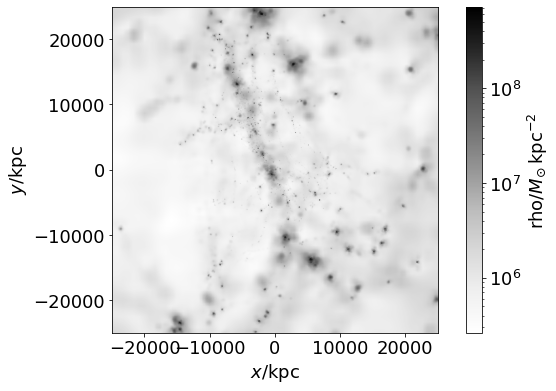

In [23]:
im = pynbody.plot.image(s.d,width='50 Mpc', units='Msol kpc^-2', cmap=cm.Greys)

SimArray([[777.4288 , 779.6284 , 781.82874, ..., 619.7373 , 617.4603 ,
           615.18365],
          [780.628  , 782.8705 , 785.1136 , ..., 621.76434, 619.48676,
           617.2098 ],
          [783.82556, 786.1108 , 788.3965 , ..., 623.7901 , 621.51196,
           619.23456],
          ...,
          [741.03326, 743.2793 , 745.5217 , ..., 888.7445 , 885.8624 ,
           882.9797 ],
          [737.3963 , 739.6291 , 741.85803, ..., 886.6705 , 883.8273 ,
           880.9835 ],
          [733.7491 , 735.96875, 738.18445, ..., 884.59467, 881.79047,
           878.986  ]], dtype=float32, 'Msol kpc**-3')

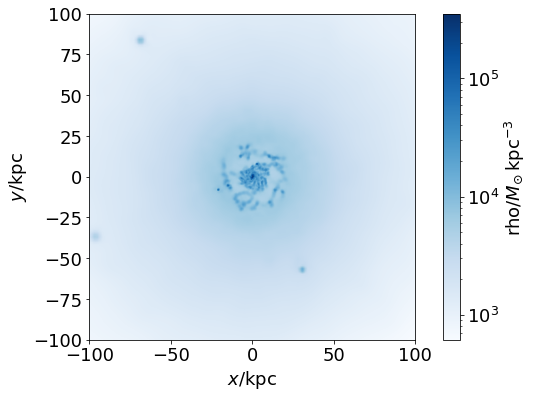

In [24]:
pynbody.plot.image(h[1].g,width='200 kpc', av_z=True, cmap=cm.Blues)

Typically we want to make sure the system is aligned in some predictable way, so pynbody allows us to easily make the disk angular momentum axis the z-axis:

In [25]:
pynbody.analysis.angmom.faceon(h[1],cen=(0,0,0))

we use `cen=(0,0,0)` because we have already centered it in the previous step... if you don't specify a center, it is first centered and then aligned. Now lets look at a slice of the gas disk edge-on: 

SimArray([[19602.258, 19579.625, 19556.992, ..., 20811.406, 20849.719,
           20888.031],
          [19652.078, 19631.775, 19611.475, ..., 20966.773, 21006.592,
           21046.41 ],
          [19701.896, 19683.926, 19665.957, ..., 21122.143, 21163.467,
           21204.791],
          ...,
          [23214.578, 23186.459, 23158.34 , ..., 19976.223, 19983.758,
           19991.295],
          [23105.31 , 23080.625, 23055.941, ..., 19893.758, 19896.078,
           19898.398],
          [22996.043, 22974.793, 22953.543, ..., 19811.297, 19808.398,
           19805.5  ]], dtype=float32, 'Msol kpc**-3')

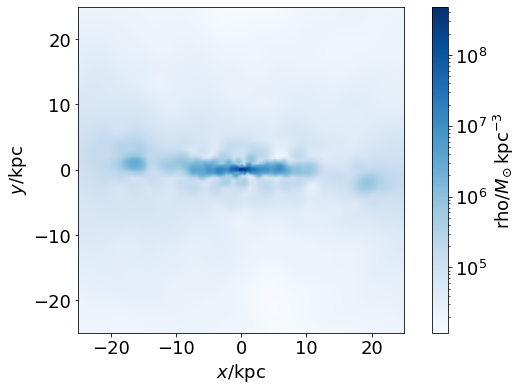

In [26]:
s.rotate_x(90)
pynbody.plot.image(h[1].g,width='50 kpc',cmap=cm.Blues)

By default, `rho` (i.e. density) is used to render the image, but you can *any* valid array is fair game:

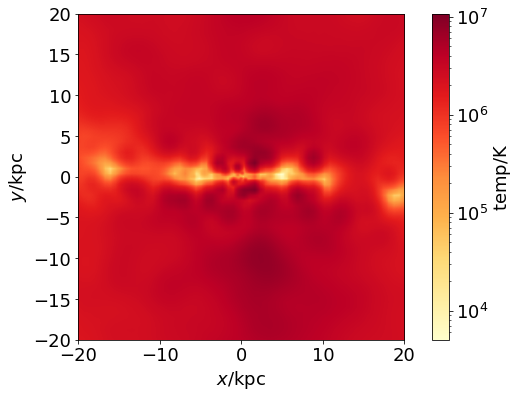

In [27]:
pynbody.plot.image(h1.g,qty='temp',width='40 kpc', cmap=cm.YlOrRd)
s.rotate_x(-90)

## Profiles

/usr/local/lib/python3.7/dist-packages/pynbody/array.py:870: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


Text(0, 0.5, '$\\Sigma$ [M$_{\\odot}$ kpc$^{-2}$]')

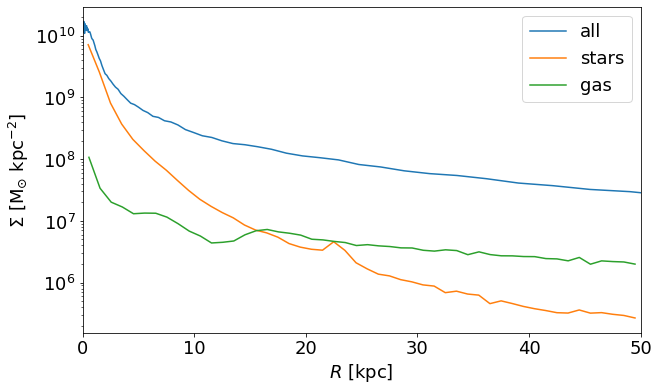

In [28]:
p = pynbody.analysis.profile.Profile(h1,max='200 kpc',min='.1 kpc',type='log',nbins=100)
ps = pynbody.analysis.profile.Profile(h1.s,max='50 kpc',nbins=50)
pg = pynbody.analysis.profile.Profile(h1.g,max='50 kpc',nbins=50)
plot(p['rbins'], p['density'], label = 'all')
plot(ps['rbins'], ps['density'], label = 'stars')
plot(pg['rbins'], pg['density'], label = 'gas')
semilogy()
xlim(0,50)
legend()
xlabel('$R$ [kpc]')
ylabel('$\Sigma$ [M$_{\odot}$ kpc$^{-2}$]')

The `Profile` class has lots of built-in functionality... including calculating a rotation curve:

pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


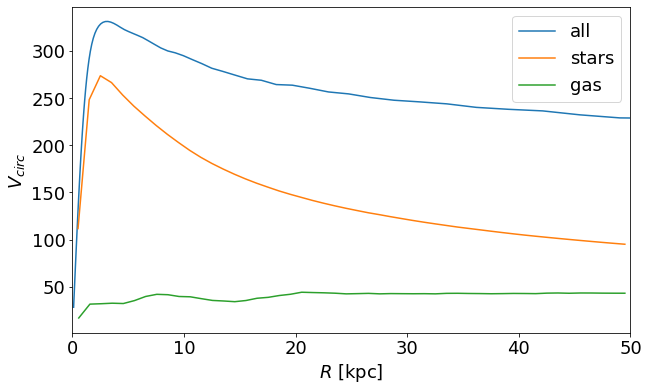

In [29]:
plot(p['rbins'], p['v_circ'], label = 'all')
plot(ps['rbins'], ps['v_circ'], label = 'stars')
plot(pg['rbins'], pg['v_circ'], label = 'gas')
xlim(0,50)
xlabel('$R$ [kpc]')
ylabel('$V_{circ}$')
legend()

`Profile` can use *any* loaded (or loadable/derivable!) array: 

Text(0, 0.5, 'Age [Gyr]')

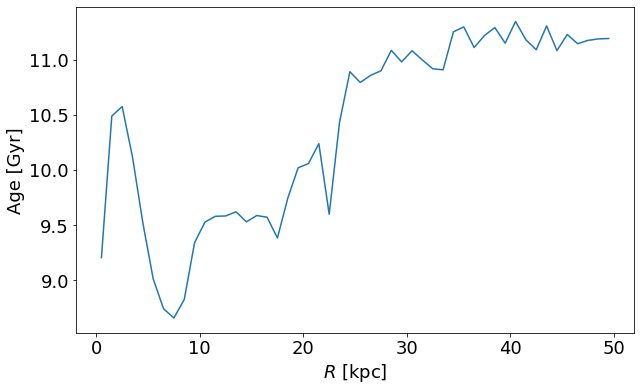

In [30]:
plot(ps['rbins'],ps['age'])
xlabel('$R$ [kpc]')
ylabel('Age [Gyr]')

By default, `Profile` calculates the means of quantities, but it trivially calculate derivatives and root-mean-square values as well: 

Text(0, 0.5, 'd$v_{c}$/d$R$')

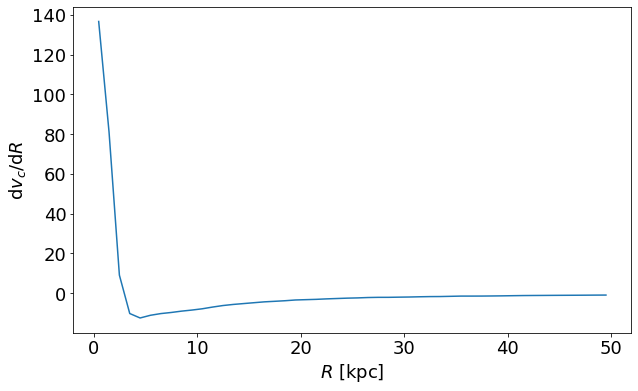

In [31]:
plot(ps['rbins'],ps['d_v_circ'])
xlabel('$R$ [kpc]')
ylabel('d$v_{c}$/d$R$')

Text(0, 0.5, '$v_{rms}$')

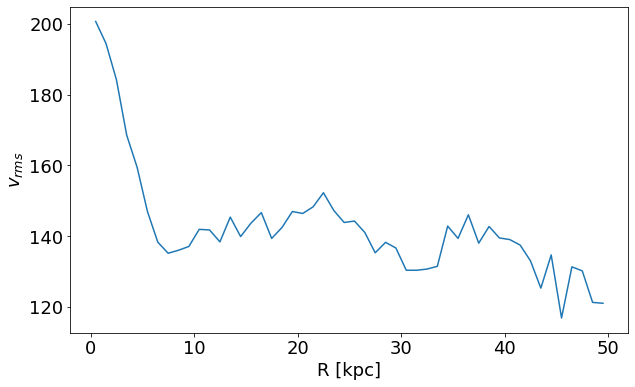

In [32]:
plot(ps['rbins'],ps['vr_rms'])
xlabel('R [kpc]')
ylabel('$v_{rms}$')

## Filters

You can define filters to easily select particles based on their quantities. For example, to get stars that are 1-2 Gyr old:

In [33]:
agefilt = pynbody.filt.BandPass('age', '1 Gyr','2 Gyr')
agefilt

BandPass('age', 'Gyr', '2.00e+00 Gyr')

In [34]:
sphere = pynbody.filt.Sphere('50 kpc')
h1[sphere].s

<SimSnap "/content/testdata/g15784.lr.01024:halo_1:sphere::star" len=242858>

In [35]:
h1.s[sphere]['mass'].sum().in_units('1e12 Msol')

SimArray(0.10313312, '1.00e+12 Msol')

you can combine filters by using simple logic operators -- so to get the total mass of all 1-2 Gyr old stars within 50 kpc, you can do

In [36]:
h1.s[sphere&agefilt]['mass'].sum().in_units('1e12 Msol')


SimArray(0.00231785, '1.00e+12 Msol')

## Units

You've noticed by now that we've been asking for things in various kinds of units. `Pynbody` has a unit-handling system built in that automatically ensures that arrays in different units are compatible and performs the necessary conversions for calculations. Adding mass and position together makes no sense, and pynbody knows this: 

In [37]:
s['mass'] + s['x']

ValueError: ignored

but, it handles this just fine and returns an array with the right units: 

In [38]:
s['mass']*s['x']

SimArray([-1.11405446e+09, -1.04208223e+09, -1.01781848e+09, ...,
          -1.34612686e+06,  1.56832945e+04,  4.33084960e+06], 'Msol kpc')

This concludes the basic overview of what ``pynbody`` can do -- for more tutorials and in-depth explanation of the inner-workings of the framework, head over to the [walkthroughs](http://pynbody.github.io/pynbody/tutorials/tutorials.html#walkthroughs) and [cookbook examples](http://pynbody.github.io/pynbody/tutorials/tutorials.html#cookbook-recipes). If you're stuck implementing a particular analysis workflow, stop by our [Github issues](https://github.com/pynbody/pynbody/issues) and post your question, we'll be happy to help. 